In [1]:
from math import sqrt
from statistics import mean

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from turtle import title
import seaborn as sns

In [3]:
df_ieee = pd.read_csv("SOURCE/IEEE_Xplore.csv", sep=',', quotechar='"')
df_ieee['Publication Title'] = df_ieee['Publication Title'].str.replace(r'^[0-9]* ', '')
df_ieee['Publication Title'] = df_ieee['Publication Title'].str.replace(r'[0-9]+(?:st| st|nd| nd|rd| rd|th| th) ', '')
pd.DataFrame(df_ieee.groupby('Publication Title')['Document Title'].count().sort_values(ascending=False)).to_csv("COUNT/IEEE_Xplore_count.csv")

<ipython-input-3-02d2bf4ca36d>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_ieee['Publication Title'] = df_ieee['Publication Title'].str.replace(r'^[0-9]* ', '')
<ipython-input-3-02d2bf4ca36d>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_ieee['Publication Title'] = df_ieee['Publication Title'].str.replace(r'[0-9]+(?:st| st|nd| nd|rd| rd|th| th) ', '')


In [2]:
df_acm = pd.read_csv("SOURCE/ACM_cleaned.csv", header=None)
df_acm[0] = df_acm[0].str.replace("Proceedings of the [0-9]+(?:st| st|nd| nd|rd| rd|th| th) ","")
df_acm[0] = df_acm[0].str.replace("Proceedings of the [0-9][0-9][0-9][0-9] "."")
df_acm[0] = df_acm[0].str.replace(" \d+$"."")
pd.DataFrame(df_acm.groupby(0)[0].count().sort_values(ascending=False)).to_csv("COUNT/ACM_count.csv")

<ipython-input-2-d5d20eab38a3>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_acm[0] = df_acm[0].str.replace("Proceedings of the [0-9]+(?:st| st|nd| nd|rd| rd|th| th) ","")
<ipython-input-2-d5d20eab38a3>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_acm[0] = df_acm[0].str.replace("Proceedings of the [0-9][0-9][0-9][0-9] ","")
<ipython-input-2-d5d20eab38a3>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df_acm[0] = df_acm[0].str.replace(" \d+$","")


In [5]:
df_springer = pd.read_csv("SOURCE/Springer.csv". sep=',')
pd.DataFrame(df_springer.groupby("Publication Title")["Publication Title"].count().sort_values(ascending=False)).to_csv("COUNT/Springer_count.csv")

In [7]:
df_sciencedirect = pd.read_csv("SOURCE/ScienceDirect.csv", sep=',', header=None)
pd.DataFrame(df_sciencedirect.groupby(0)[0].count().sort_values(ascending=False)).to_csv("COUNT/ScienceDirect_count.csv")

In [11]:
df_acl = pd.read_csv("ACL_Anthology.csv", sep=',', escapechar='\\')
df_acl['Year']=pd.to_numeric(df_acl["Year"])
df_acl = df_acl[df_acl['Year'] >= 2017]
df_acl

cols_to_filter = ['Abstract', 'Title']
search_values = ["topic label", "topic labels", "topic labeling", "topic labelling"]

patt = '|'.join(search_values)

mask = df_acl[cols_to_filter].apply(lambda x: x.str.contains(patt, case=False)).any(1)
df_acl = df_acl[mask].copy()

df_acl['Venue'] = df_acl['Venue'].str.replace("Proceedings of the [0-9]+(?:st| st|nd| nd|rd| rd|th| th) ","")
df_acl['Venue'] = df_acl['Venue'].str.replace("Proceedings of the [0-9][0-9][0-9][0-9] ","")
df_acl.groupby('Venue')['Venue'].count().sort_values(ascending=False).to_csv("ACL_Anthology_count.csv")

<ipython-input-11-2392329de022>:14: FutureWarning: The default value of regex will change from True to False in a future version.
  df_acl['Venue'] = df_acl['Venue'].str.replace("Proceedings of the [0-9]+(?:st| st|nd| nd|rd| rd|th| th) ","")
<ipython-input-11-2392329de022>:15: FutureWarning: The default value of regex will change from True to False in a future version.
  df_acl['Venue'] = df_acl['Venue'].str.replace("Proceedings of the [0-9][0-9][0-9][0-9] ","")


Venue
Proceedings of the International Conference on Recent Advances in Natural Language Processing (RANLP 2021)       2
Conference of the European Chapter of the Association for Computational Linguistics: Main Volume                 1
Conference of the {E}uropean Chapter of the Association for Computational Linguistics: Volume 2, Short Papers    1
Findings of the Association for Computational Linguistics: EMNLP 2021                                            1
International Conference on Natural Language Generation                                                          1
Proceedings of the The 19th Annual Workshop of the Australasian Language Technology Association                  1
Name: Venue, dtype: int64

In [10]:
pd.DataFrame(df_acl.groupby('Venue')['Venue'].count().sort_values(ascending=False))

,Venue
Venue,
Proceedings of the International Conference on Recent Advances in Natural Language Processing (RANLP 2021),2
Conference of the European Chapter of the Association for Computational Linguistics: Main Volume,1
"Conference of the {E}uropean Chapter of the Association for Computational Linguistics: Volume 2, Short Papers",1
Findings of the Association for Computational Linguistics: EMNLP 2021,1
International Conference on Natural Language Generation,1
Proceedings of the The 19th Annual Workshop of the Australasian Language Technology Association,1


IndexError: single positional indexer is out-of-bounds

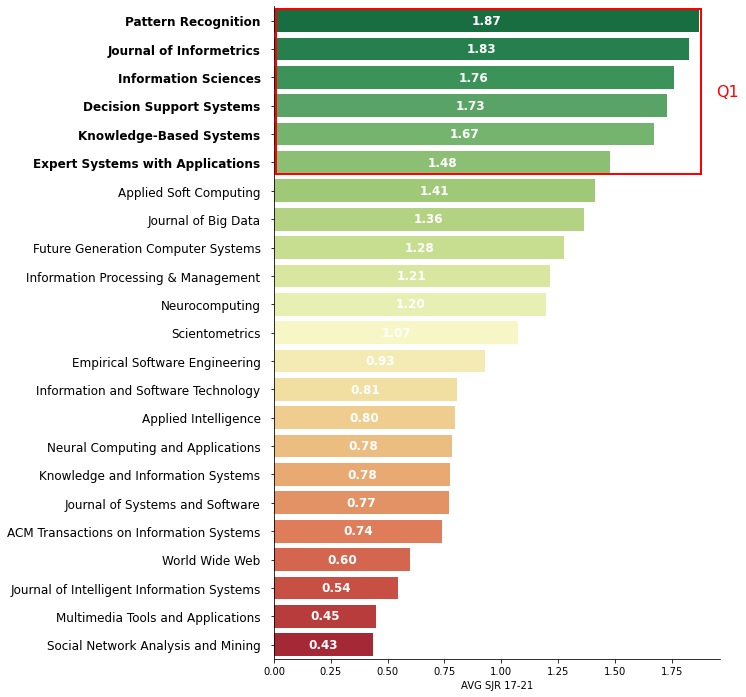

In [93]:
dict = {
    'Pattern Recognition': [1.871],
    'Journal of Informetrics': [1.827],
    'Information Sciences': [1.758],
    'Decision Support Systems': [1.729],
    'Knowledge-Based Systems': [1.674],
    'Expert Systems with Applications': [1.479],
    'Applied Soft Computing': [1.414],
    'Journal of Big Data': [1.363],
    'Future Generation Computer Systems': [1.278],
    'Information Processing & Management': [1.214],
    'Neurocomputing': [1.198],
    'Scientometrics': [1.075],
    'Empirical Software Engineering': [0.930],
    'Information and Software Technology': [0.806],
    'Applied Intelligence': [0.796],
    'Neural Computing and Applications': [0.784],
    'Knowledge and Information Systems': [0.775],
    'Journal of Systems and Software': [0.771],
    'ACM Transactions on Information Systems': [0.739],
    'World Wide Web': [0.598],
    'Journal of Intelligent Information Systems': [0.544],
    'Multimedia Tools and Applications': [0.449],
    'Social Network Analysis and Mining': [0.435]
}

import matplotlib.patches as patches

nr_res = pd.DataFrame(dict)
df_bar = nr_res.reset_index().melt(id_vars=["index"])
fig, ax = plt.subplots(figsize=(8, 12))
g = sns.barplot(y="variable", x="value", data=df_bar, ax=ax, palette=sns.color_palette("RdYlGn_r", n_colors=23))
g.set_xlabel('AVG SJR 17-21')
g.set_ylabel('')
sns.despine()

# Make the text of the first 6 y-axis entries bold
ax.tick_params(axis='y', which='major', pad=10)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
for i in range(6):
    ax.get_yticklabels()[i].set_fontweight('bold')

# Calculate the width of the rectangle
rect_width = df_bar['value'][:1].sum()

# Add a rectangle that encloses the first six bars
rect = patches.Rectangle((0.01, -0.4), rect_width, 5.8, linewidth=2, edgecolor='red', facecolor='none')
ax.add_patch(rect)

# Add the "Q1" label to the rectangle
ax.text(rect.get_x() + rect.get_width()/2+1.05, rect.get_y() + rect.get_height()/2, 'Q1', fontsize=16, ha='center', va='center', color='red')

# Write the x-axis values inside each bar
for i, p in enumerate(ax.patches):
    ax.text(p.get_x() + p.get_width()/2, p.get_y() + p.get_height()/2, f'{df_bar.iloc[i]["value"]:.2f}', ha='center', va='center', color='white', fontsize=12, fontweight='bold')

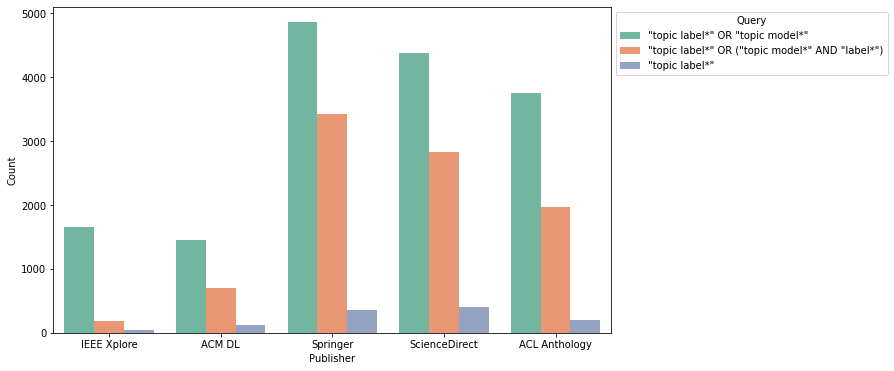

In [57]:
dict = {
    "IEEE Xplore" : [1649, 179, 39],
    "ACM DL" : [1447, 708, 128],
    "Springer" : [4863, 3427, 364],
    "ScienceDirect" : [4385, 2833, 397],
    "ACL Anthology" : [3750, 1970, 206],
}

nr_res = pd.DataFrame(dict)
df_bar = nr_res.reset_index().melt(id_vars=["index"])

fig, ax = plt.subplots(figsize=(10, 6))
sns.set_palette("Set2")
g = sns.barplot(x="variable", y="value", hue="index", data=df_bar, ax = ax)

h, l = g.get_legend_handles_labels()
g.legend(h, ['"topic label*" OR "topic model*"','"topic label*" OR ("topic model*" AND "label*")','"topic label*"'], title="Interested in politics")
g.set_xlabel("Publisher")
g.set_ylabel("Count")

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), title='Query')

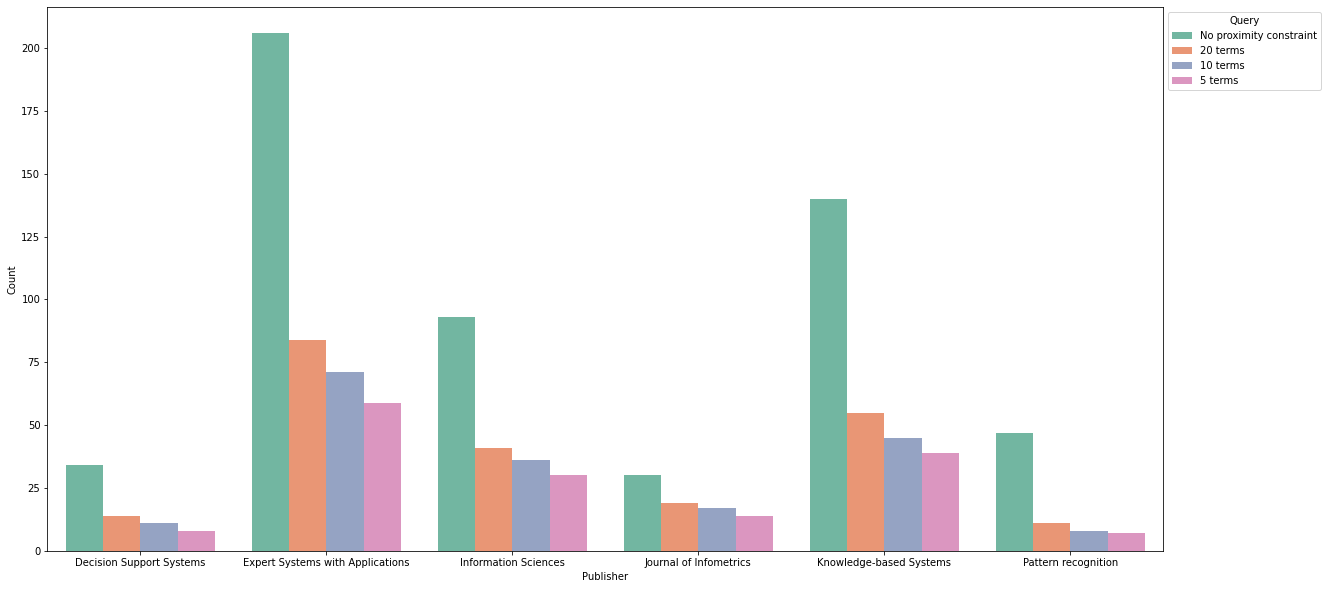

In [8]:
dict = {
    "Decision Support Systems": [34, 14, 11, 8],
    "Expert Systems with Applications": [206, 84, 71, 59],
    "Information Sciences": [93, 41, 36, 30],
    "Journal of Infometrics": [30, 19, 17, 14],
    "Knowledge-based Systems": [140, 55, 45, 39],
    "Pattern recognition": [47, 11, 8, 7]
}

nr_res = pd.DataFrame(dict)
df_bar = nr_res.reset_index().melt(id_vars=["index"])

fig, ax = plt.subplots(figsize=(20, 10))
sns.set_palette("Set2")
g = sns.barplot(x="variable", y="value", hue="index", data=df_bar, ax = ax)

h, l = g.get_legend_handles_labels()
g.legend(h, ['No proximity constraint', '20 terms', '10 terms', '5 terms'])
g.set_xlabel("Publisher")
g.set_ylabel("Count")

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), title='Query')

In [5]:
    "Expert Systems with Applications": [205, 84, 71, 59],

SyntaxError: illegal target for annotation (<ipython-input-5-b408fd248241>, line 1)

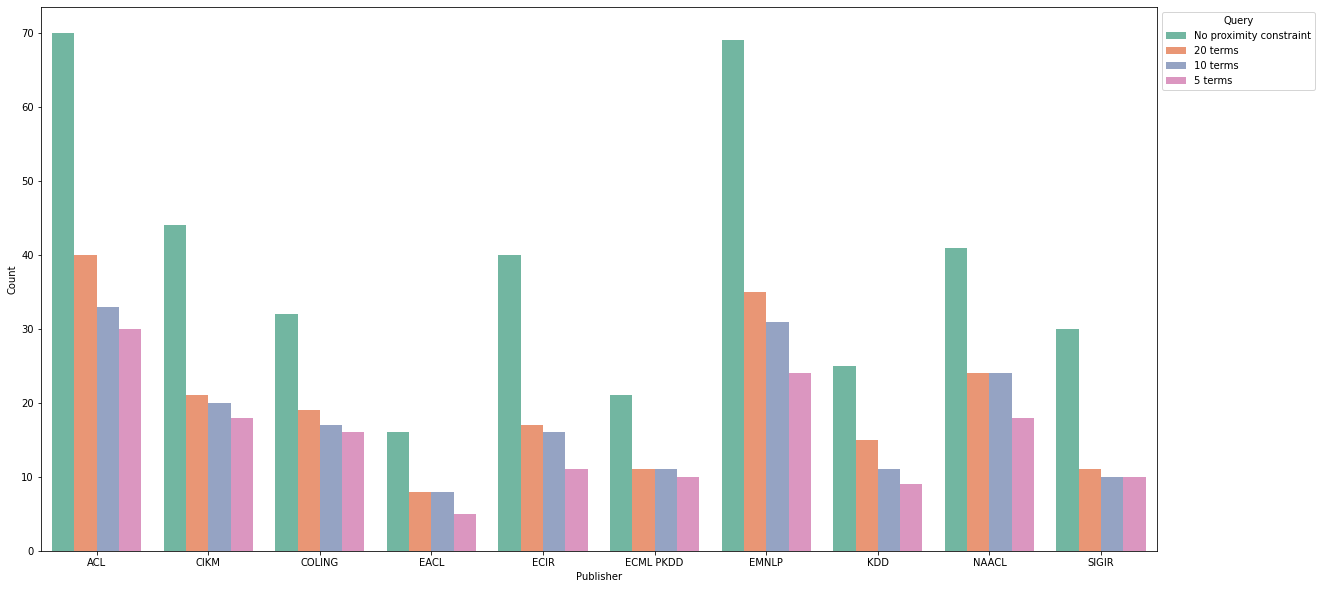

In [9]:
dict = {
    "ACL": [70, 40, 33, 30],
    "CIKM": [44, 21, 20, 18],
    "COLING": [32, 19, 17, 16],
    "EACL": [16, 8, 8, 5],
    "ECIR": [40, 17, 16, 11],
    "ECML PKDD": [21, 11, 11, 10],
    "EMNLP": [69, 35, 31, 24],
    "KDD": [25, 15, 11, 9],
    "NAACL": [41, 24, 24, 18],
    "SIGIR": [30, 11, 10, 10]
}

nr_res = pd.DataFrame(dict)
df_bar = nr_res.reset_index().melt(id_vars=["index"])

fig, ax = plt.subplots(figsize=(20, 10))
sns.set_palette("Set2")
g = sns.barplot(x="variable", y="value", hue="index", data=df_bar, ax = ax)

h, l = g.get_legend_handles_labels()
g.legend(h, ['No proximity constraint', '20 terms', '10 terms', '5 terms'])
g.set_xlabel("Publisher")
g.set_ylabel("Count")

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), title='Query')

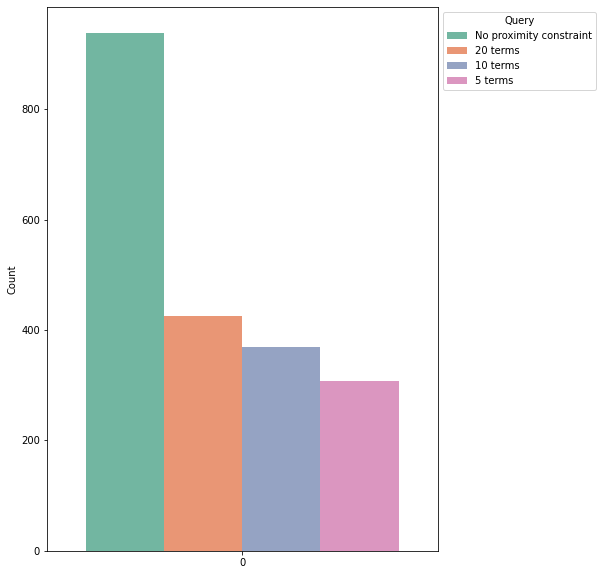

In [10]:
totals = [938, 425, 369, 308]

nr_res = pd.DataFrame(totals)
df_bar = nr_res.reset_index().melt(id_vars=["index"])

fig, ax = plt.subplots(figsize=(7, 10))
sns.set_palette("Set2")
g = sns.barplot(x="variable", y="value", hue="index", data=df_bar, ax = ax)

h, l = g.get_legend_handles_labels()
g.legend(h, ['No proximity constraint', '20 terms', '10 terms', '5 terms'])
g.set_xlabel("")
g.set_ylabel("Count")

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), title='Query')

In [8]:
totals = pd.DataFrame([70, 68, 66, 64], columns=['20 terms', '10 terms', '5 terms', '3 terms'])

nr_res = pd.DataFrame(totals)
df_bar = nr_res.reset_index().melt(id_vars=["index"])

fig, ax = plt.subplots(figsize=(7, 10))
sns.set_palette("Set2")
g = sns.barplot(x="variable", y="value", hue="index", data=df_bar, ax = ax)

h, l = g.get_legend_handles_labels()
g.set_xlabel("")
g.set_ylabel("Count")

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), title='Query')

ValueError: Shape of passed values is (4, 1), indices imply (4, 4)

In [9]:
totals = pd.DataFrame([70, 68, 66, 64], columns=['20 terms', '10 terms', '5 terms', '3 terms'])
totals

ValueError: Shape of passed values is (4, 1), indices imply (4, 4)